# Import libraries

In [1]:
!pip install --upgrade numpy scipy

In [2]:
from numpy import array, arange, nan
from scipy import interpolate

In [3]:
!pip install --upgrade git+https://github.com/ParkhomenkoDV/material.git

  Cloning https://github.com/ParkhomenkoDV/material.git to c:\users\parkh\appdata\local\temp\pip-req-build-vw40770n
  Resolved https://github.com/ParkhomenkoDV/material.git to commit 002ba688b91ba1c3e23ef26daa4a9fffde4a7494
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for material: filename=material-2024.9.29.21.10.54-py3-none-any.whl size=30174 sha256=4a6c603d07ea858a942c27f4b9d88c844e0bd5faf46b5779c0588ecbc29cf2c2
  Stored in directory: C:\Users\parkh\AppData\Local\Temp\pip-ephem-wheel-cache-ciom1jwv\wheels\da\34\ee\f2b9181ec29d7974e0bf142de41fc2324f228eedacfbb329dd
Successfully built material
  Attempting uninstall: material
    Found existing installation: material 2024.9.29.21.9.21
    Uninstalling material-2024.9.29.21.9.21:
      Successfully uninstalled material-2024.9.29.21.9.21


  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/material.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-vw40770n'


In [4]:
from material import Material, materials

In [5]:
Material.help()

Material parameters:
type value must be int, float, array with shape (-1,2) or callable(int | float)
		density
			description: плотность
			unit: [кг/м^3]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x00000138C312A700>,)
		alpha
			description: коэффициент линейного расширения
			unit: [1/К]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x00000138C312A660>,)
		E
			description: модуль Юнга I рода
			unit: [Па]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x00000138C312A520>,)
		G
			description: модуль (сдвига) Юнга II рода
			unit: [Па]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x00000138C312ACA0>,)
		mu
			description: коэффициент Пуассона
			unit: []
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<

In [6]:
material = Material('test',  # тестируемый материал
                        {
                            "density": 8400,  # int
                            "alpha": interpolate.interp1d((400, 600, 800),
                                                          array((18, 18, 18)) * 10 ** -6,
                                                          kind=1, bounds_error=False, fill_value='extrapolate'),
                            "E": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                      array([1.74, 1.66, 1.57, 1.47, 1.32]) * 10 ** 11,
                                                      kind=3, bounds_error=False, fill_value=nan),
                            "mu": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                       (0.384, 0.379, 0.371, 0.361, 0.347),
                                                       kind=3, bounds_error=False, fill_value='extrapolate'),
                            "c": lambda t: 4200,  # lambda
                            "l": ((0, 16), (100, 18), (200, 19), (400, 19.5)),  # tuple
                            "HV": array(((0, 16), (100, 18), (200, 19), (400, 19.5))),  # array
                            "smth": 3.1415  # float
                        })

In [7]:
temperature, t = arange(200, 1_200 + 1, 50), 700

In [8]:
for k, v in material.__dict__.items():
        if callable(v):
            print('\t' + f'{k}({t}): {v(t)}')

	density(700): 8400.0
	alpha(700): 1.8e-05
	E(700): 147000000000.0
	mu(700): 0.361
	c(700): 4200
	l(700): nan
	HV(700): nan
	smth(700): 3.1415


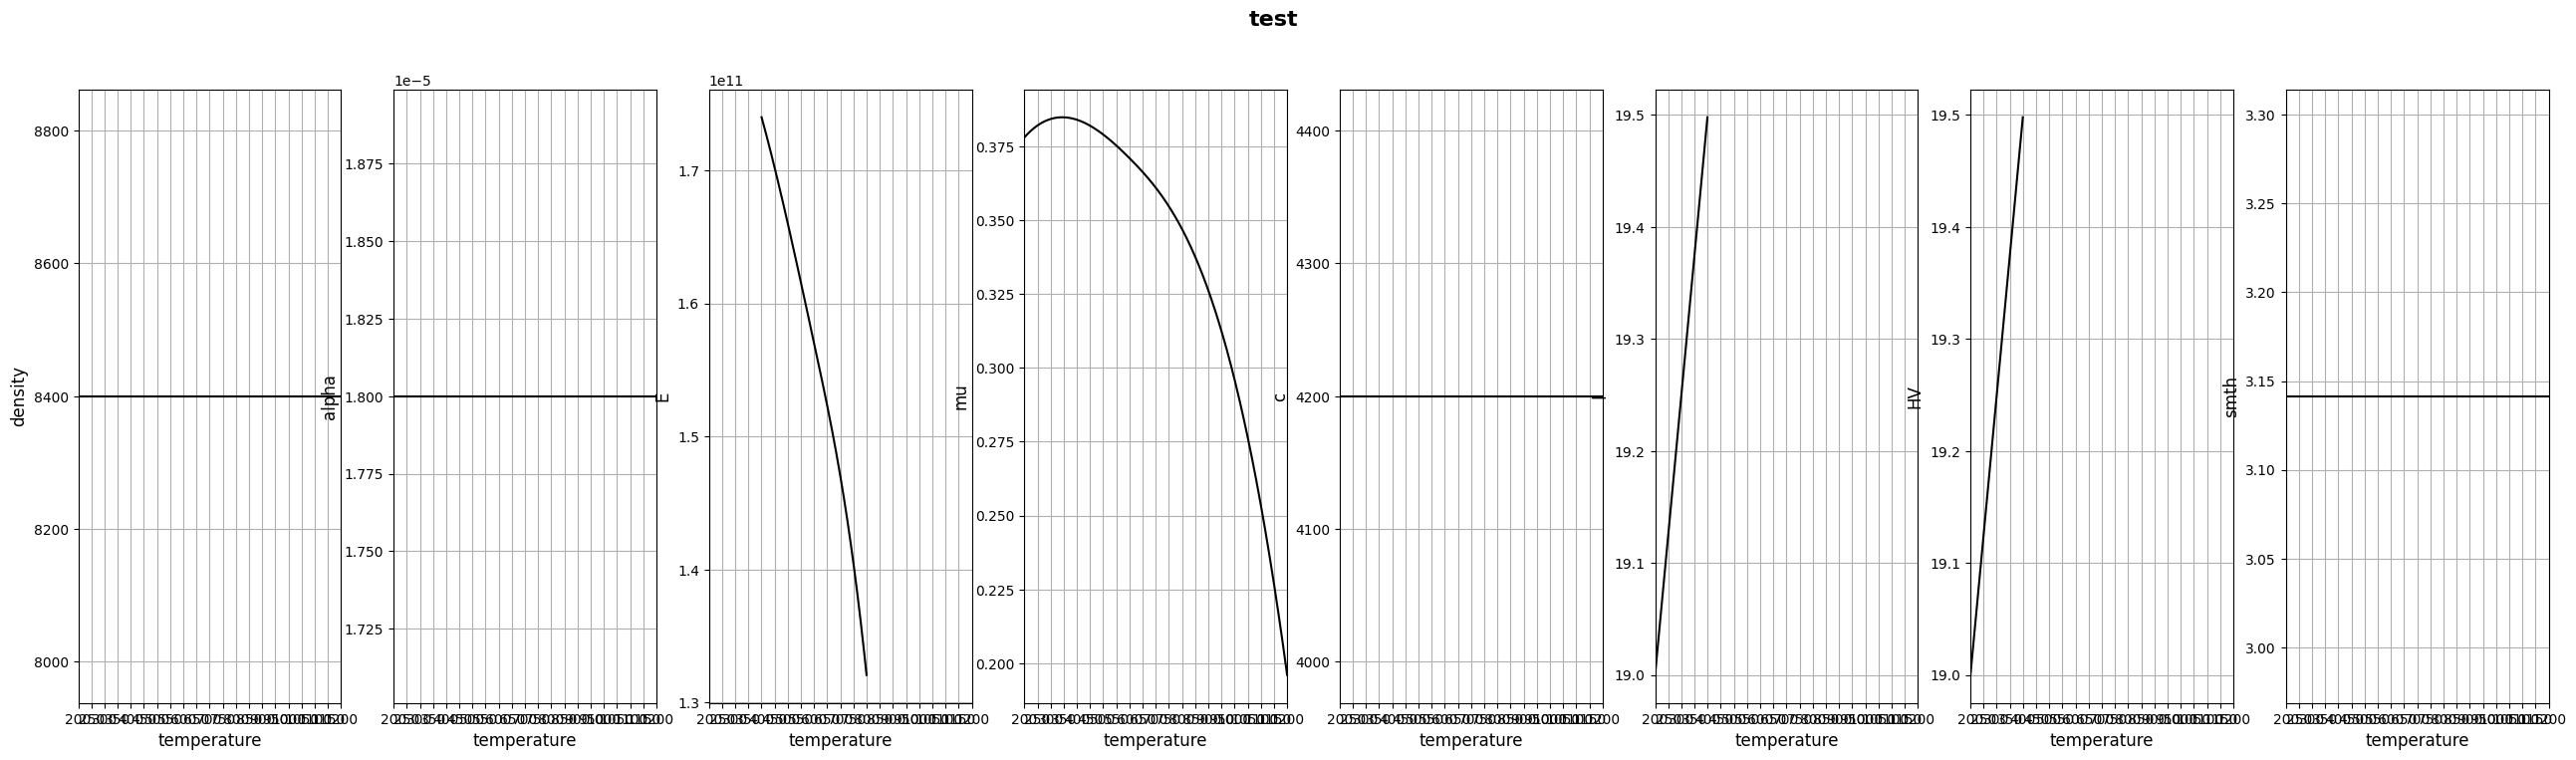

In [9]:
material.show(temperature)

ХН70МВТЮБ
	sigma_s(700): 1003882758.6206896
	sigma_t(700): 552985344.8275862
	KCU(700): nan
	sigma_100(700): nan
	sigma_200(700): nan


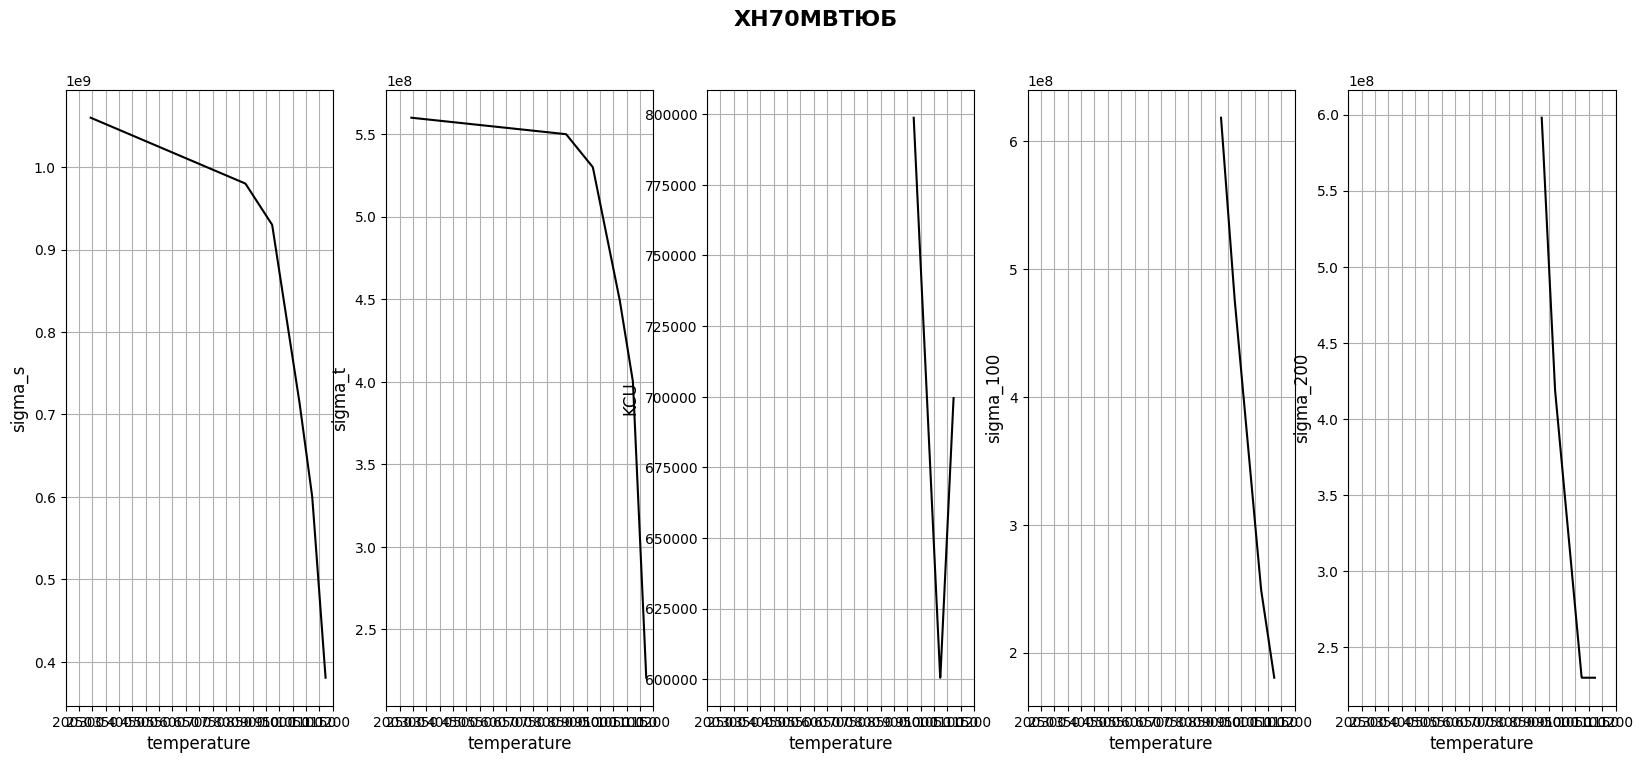

ХН80ТБЮ
	sigma_s(700): 993787685.7749468
	sigma_t(700): 616.212314225053
	KCU(700): 426874.80204756075
	sigma_1000(700): nan
	sigma_5000(700): nan
	sigma_10000(700): nan


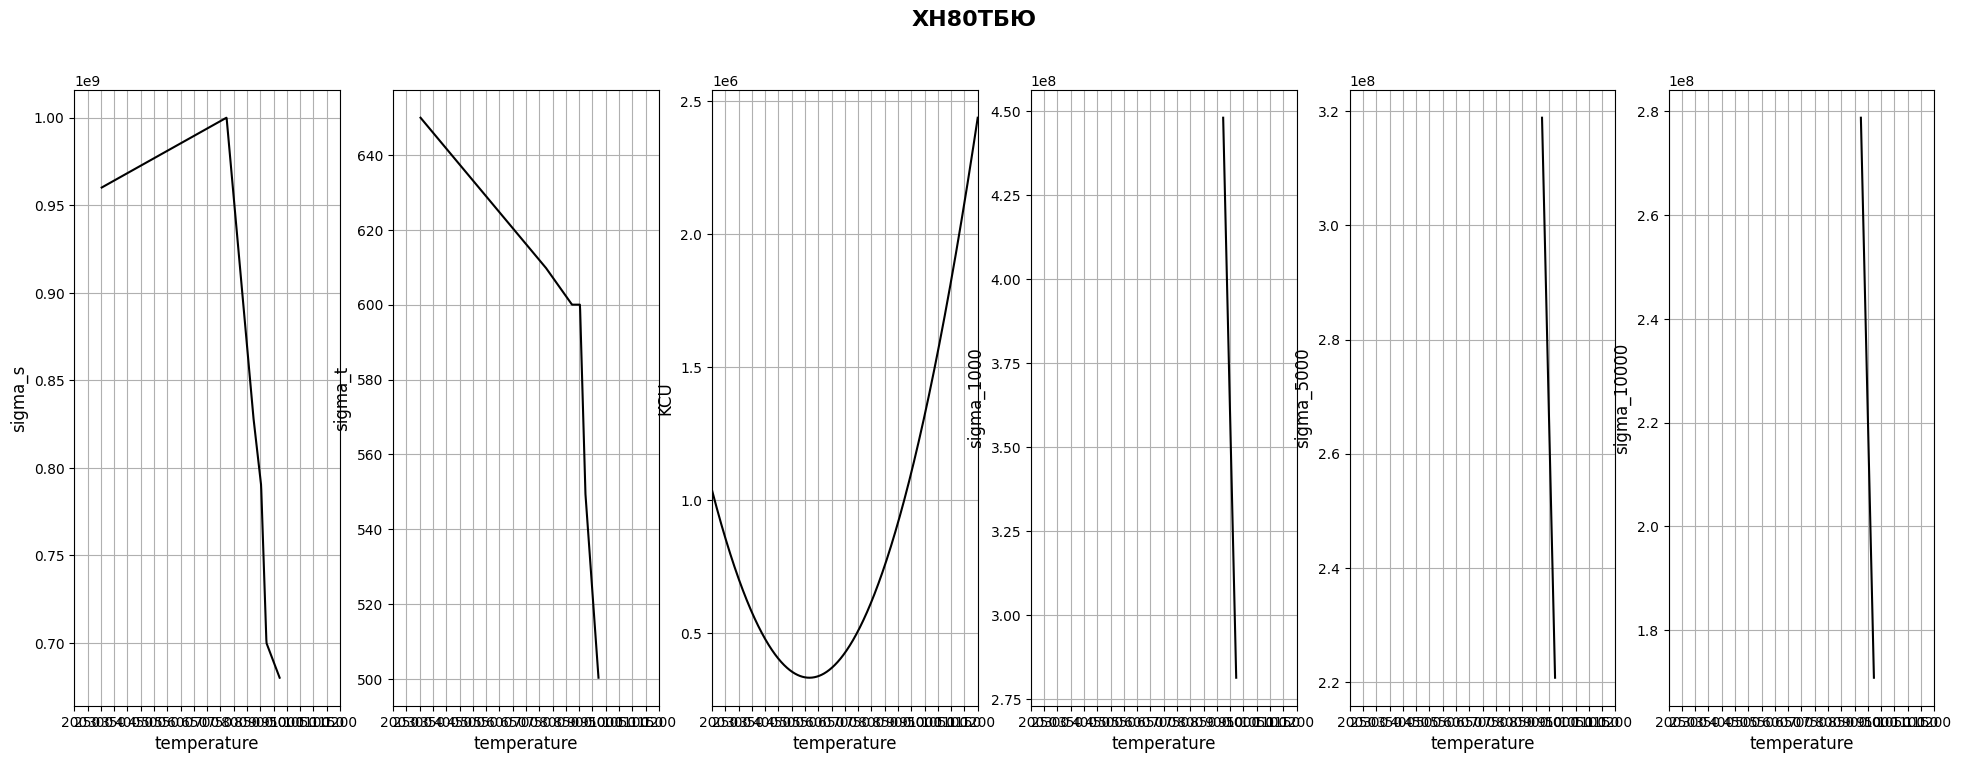

ХН70ВМТЮ
	sigma_s(700): 1021523958.3333333
	sigma_t(700): 644571875.0
	KCU(700): 884760.4166666666
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_2000(700): nan
	sigma_3000(700): nan
	sigma_5000(700): nan
	sigma_10000(700): nan
	sigma_20000(700): nan


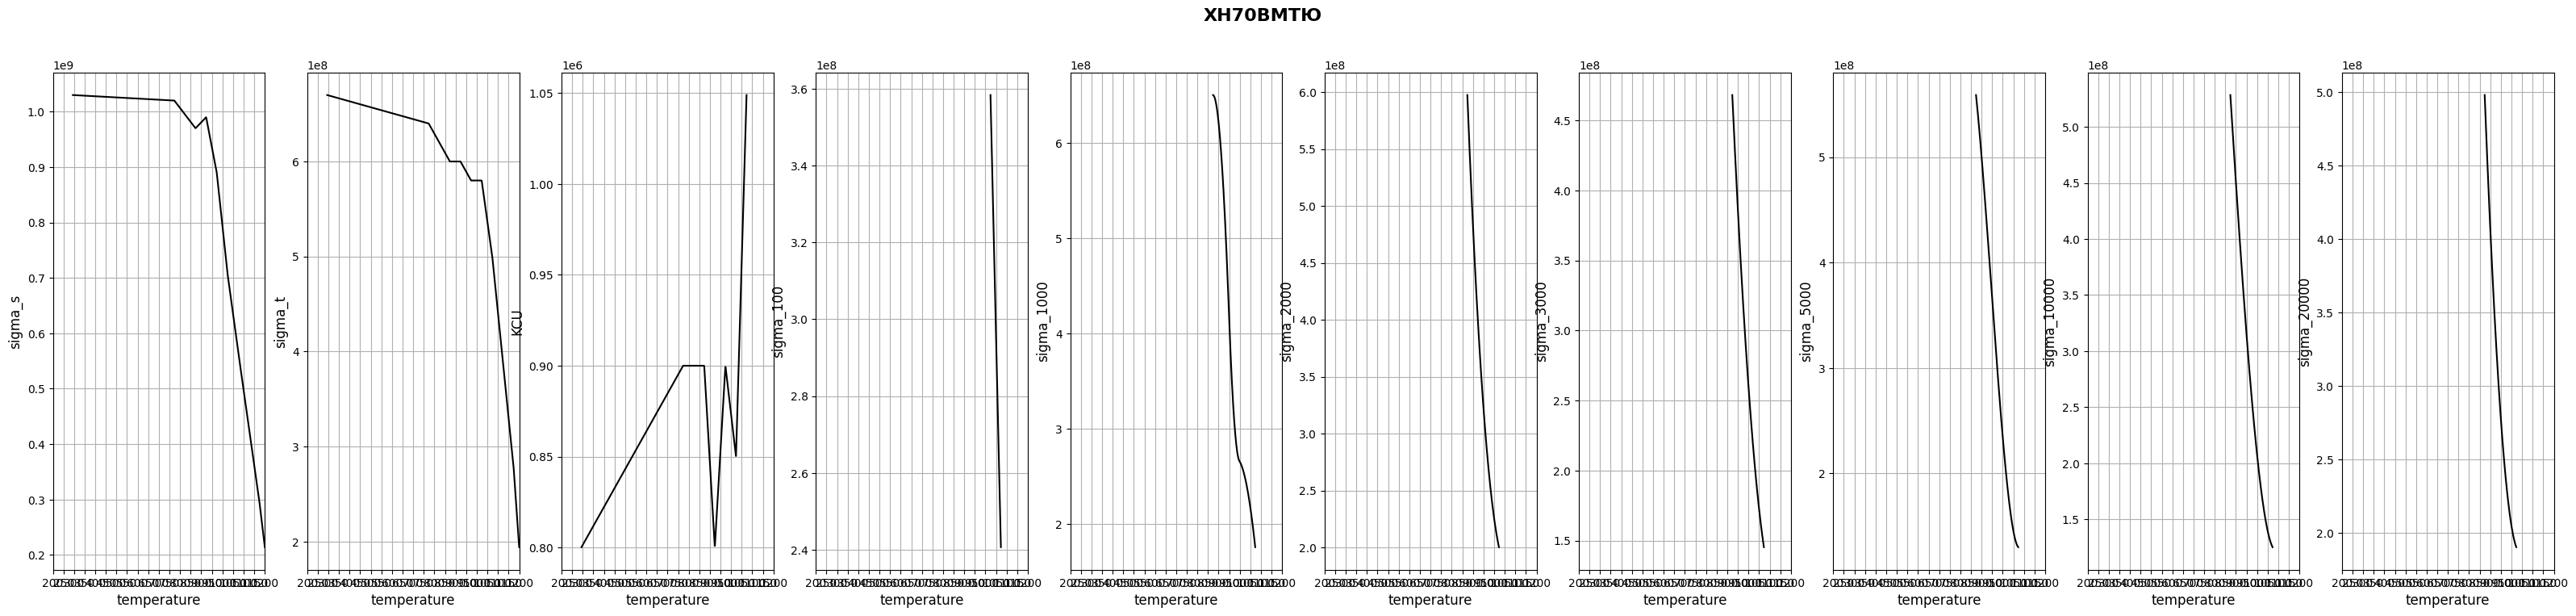

ХН55ВМКЮ
	sigma_s(700): 1088033823.5294118
	sigma_t(700): 750000000.0
	KCU(700): 259830.8823529412
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_2000(700): nan


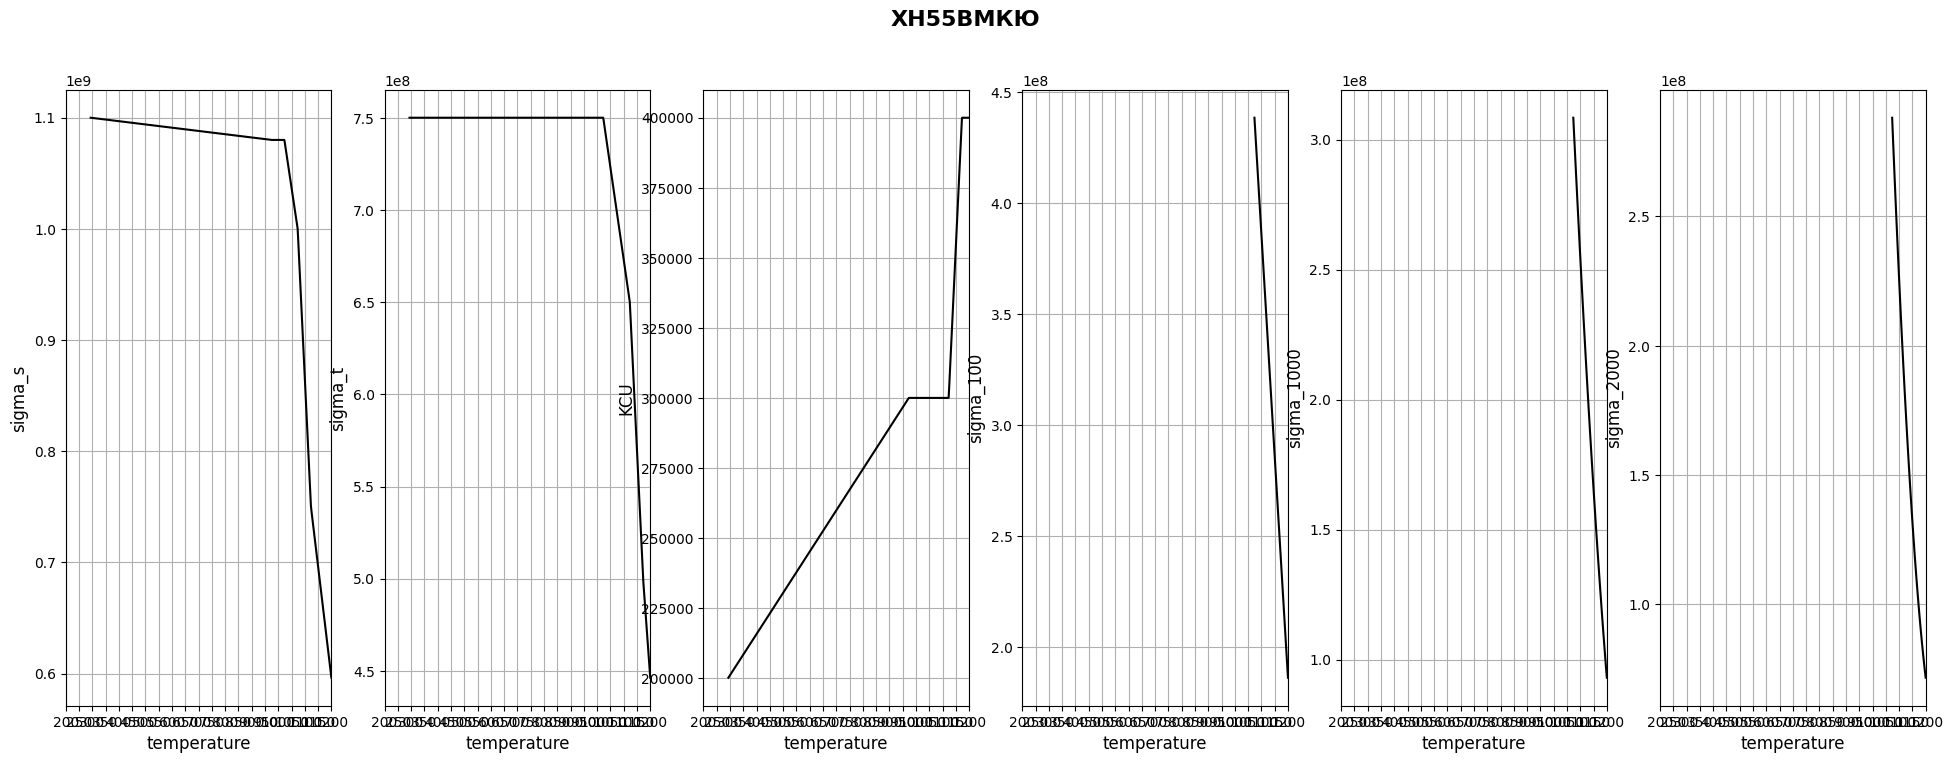

10Х18Н9Т
	sigma_s(700): 402884285.71428573
	KCU(700): 1708513.492063492
	sigma_100000(700): nan


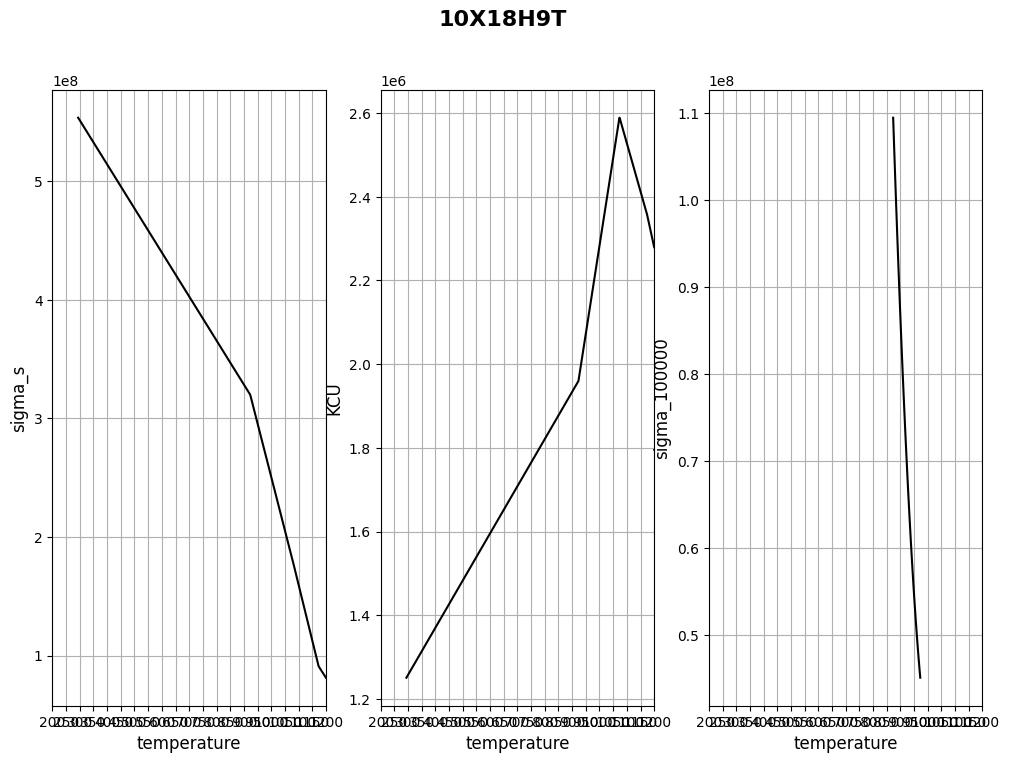

08Х18Н12М3Т
	sigma_1(700): nan
	sigma_10(700): nan
	sigma_100(700): nan
	sigma_300(700): nan
	sigma_500(700): nan
	sigma_1000(700): nan
	sigma_10000(700): nan
	sigma_100000(700): nan


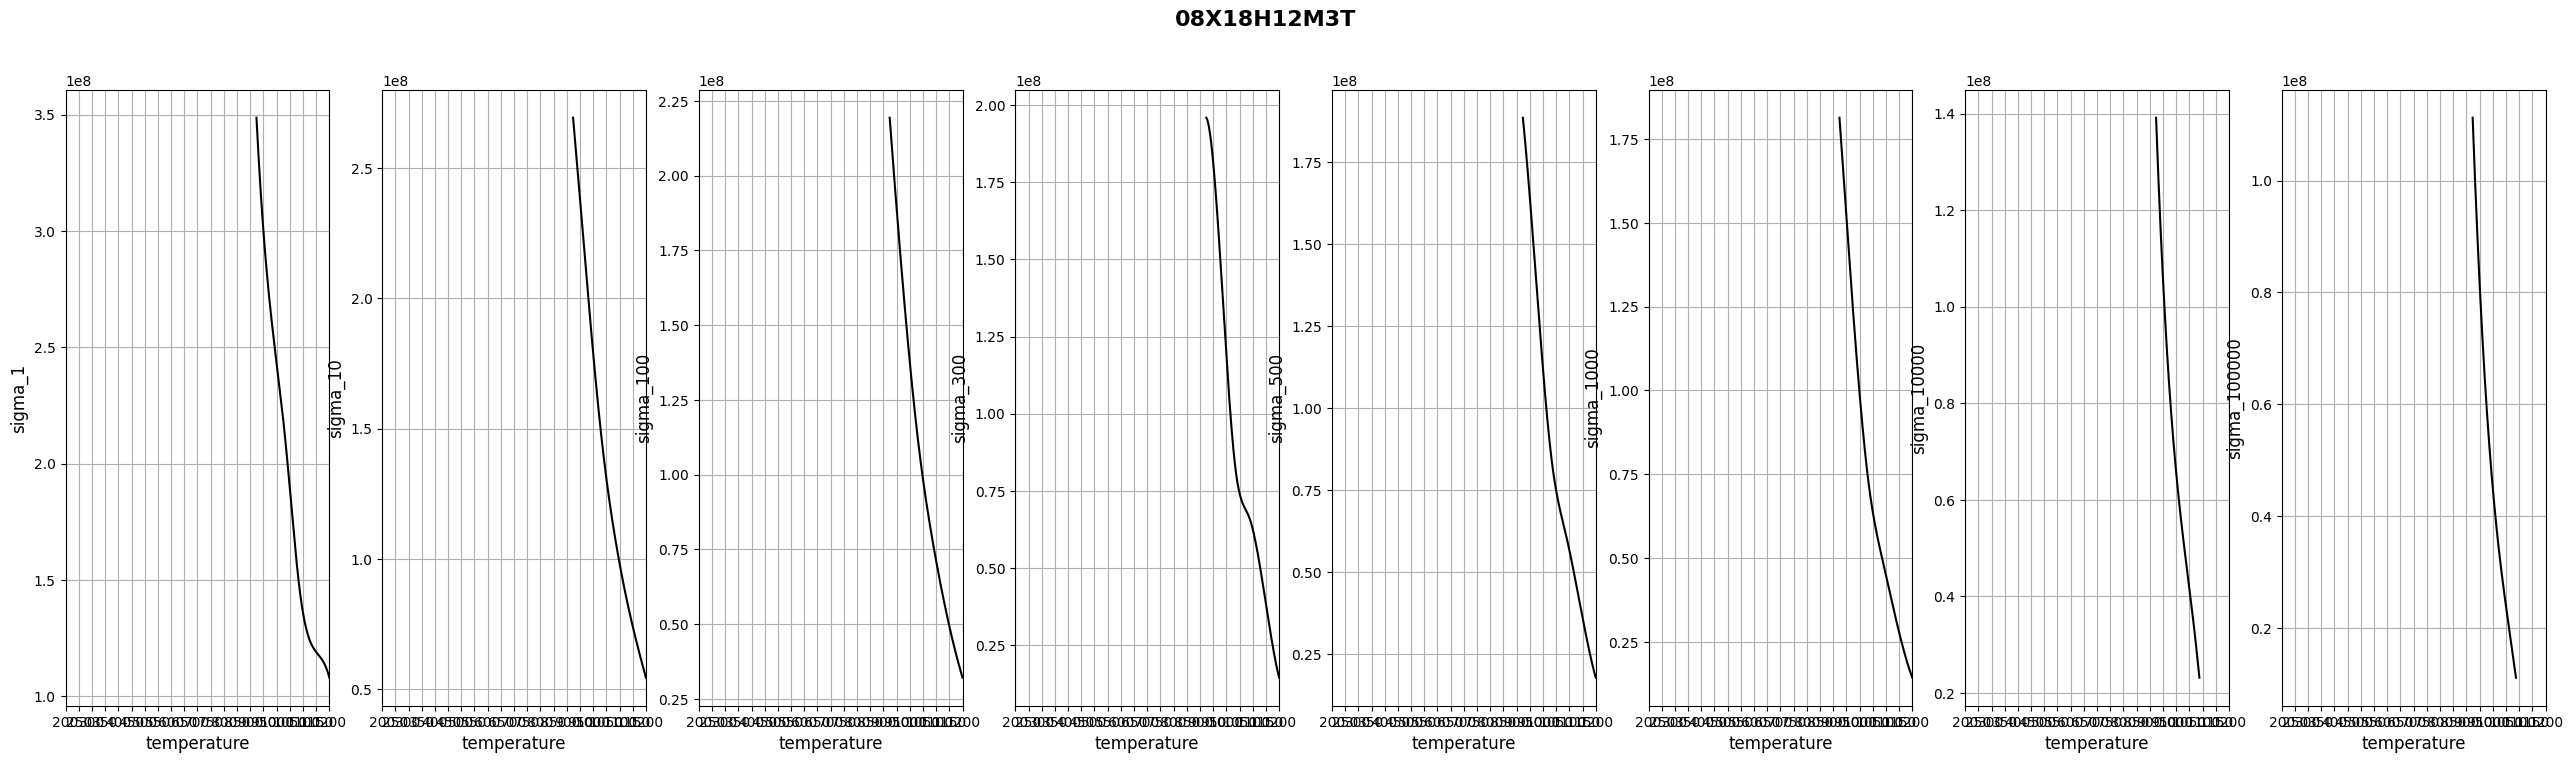

In [10]:
for material in materials:
    print(material.name)
    for k, v in material.__dict__.items():
        if callable(v):
            print('\t' + f'{k}({t}): {v(t)}')
    material.show(temperature)